In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [3]:
abalone=pd.read_csv("abalone.csv")

In [4]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone.shape

(4177, 9)

In [6]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
for age,row in abalone.iterrows():
    abalone.loc[age,"Age"]=row["Rings"]+1.5

In [9]:
abalone.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5


In [10]:
#To check duplicate value
abalone.duplicated().sum()

0

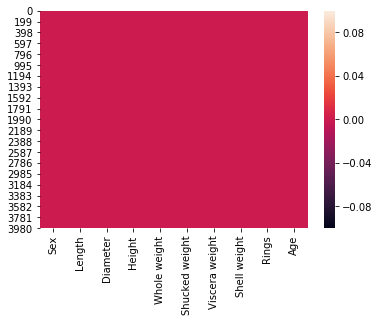

In [11]:
#To check missing value
sns.heatmap(abalone.isnull())

In [12]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [13]:
abalone=abalone.drop("Rings",axis=1)

In [14]:
abalone.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


Summary Statistic

In [15]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Check Correlation

In [16]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


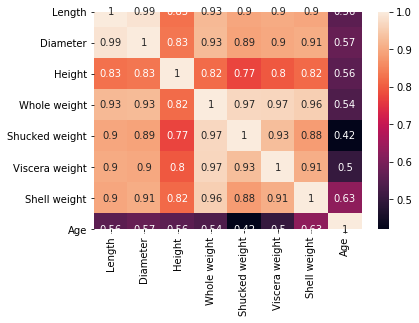

In [17]:
sns.heatmap(abalone.corr(),annot=True)

Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
labelquality = LabelEncoder()

In [19]:
abalone['Sex'] = labelquality.fit_transform(abalone['Sex'])

In [20]:
abalone.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5


Plotting Outliers

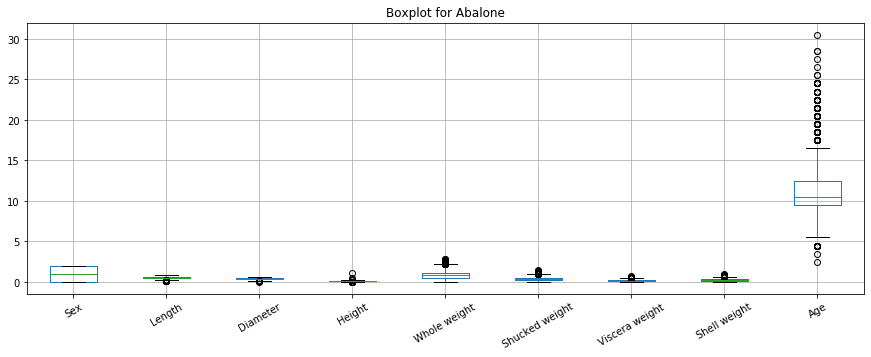

In [21]:
abalone.plot(kind='box',grid=True,title="Boxplot for Abalone",legend=True,rot=30,figsize=(15,5))

In [22]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(abalone))
print(abalone.shape)
abalone=abalone.loc[(z_score < 3).all(axis=1)]
print(abalone.shape)

(4177, 9)
(4027, 9)


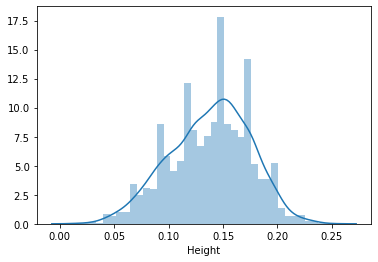

In [23]:
#Check for Skewness
sns.distplot(abalone['Height'])

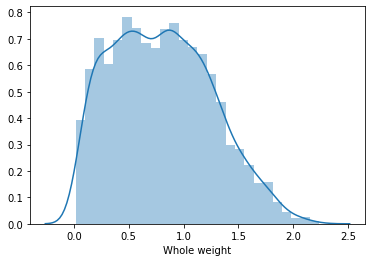

In [24]:
sns.distplot(abalone['Whole weight'])

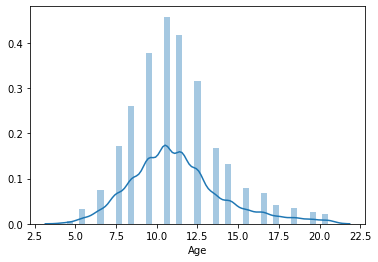

In [25]:
sns.distplot(abalone['Age'])

In [26]:
#check skewsness
abalone.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age               0.725464
dtype: float64

In [27]:
for col in abalone.columns:
    if abalone.skew().loc[col] > 0.55:
        abalone[col]=np.log1p(abalone[col])

In [28]:
abalone.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age              -0.033222
dtype: float64

In [29]:
abalone.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.032315
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.632295
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.648162
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.662203
Whole weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.590915
Shucked weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.491372
Viscera weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.566991
Shell weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.657820
Age,-0.032315,0.632295,0.648162,0.662203,0.590915,0.491372,0.566991,0.657820,1.000000


Exploring Data Variables

In [30]:
#SEX
abalone.Sex.unique()

array([2, 0, 1], dtype=int64)

In [31]:
abalone.Sex.value_counts()

2    1456
1    1322
0    1249
Name: Sex, dtype: int64

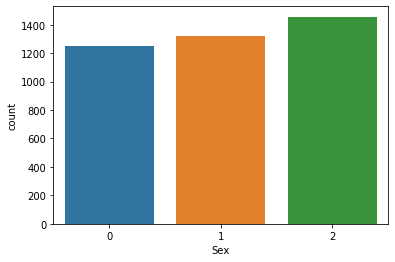

In [32]:
sns.countplot(x='Sex',data=abalone)

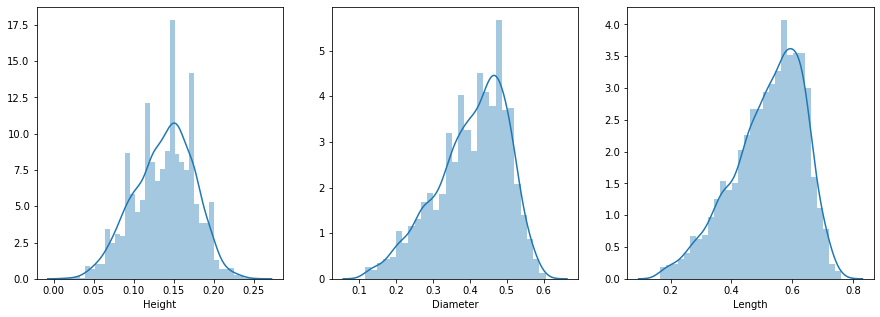

In [33]:
plt.figure(figsize=(15,5))

lines=1
rows=3
i=0

i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Height'])
i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Diameter'])
i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Length'])

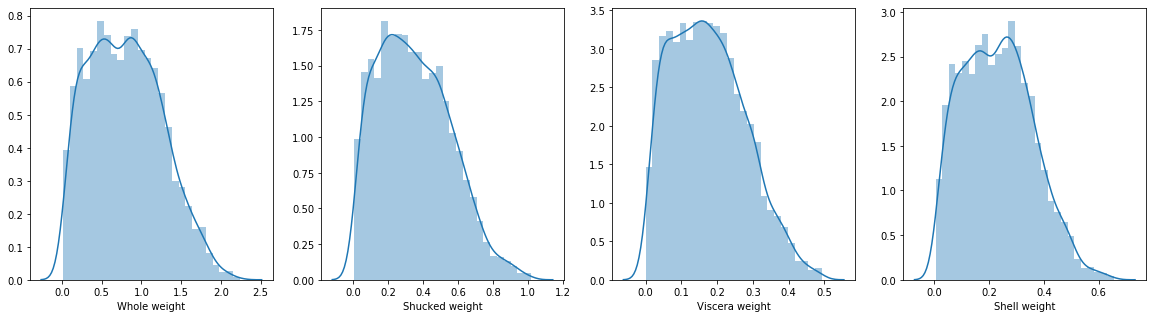

In [34]:
plt.figure(figsize=(20,5))

lines=1
rows=4
i=0

i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Whole weight'])
i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Shucked weight'])
i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Viscera weight'])
i+=1
plt.subplot(lines,rows,i)
sns.distplot(abalone['Shell weight'])

Bivariant Analysis

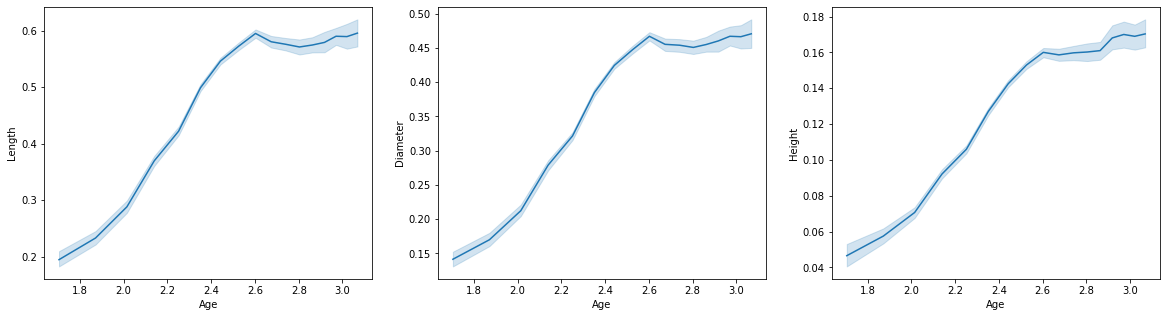

In [35]:
plt.figure(figsize=(20, 5))
colors = sns.color_palette()

lines=1
rows=3
i=0

i+=1
plt.subplot(lines,rows,i)
sns.lineplot(x='Age',y='Length',data=abalone)
i+=1
plt.subplot(lines,rows,i)
sns.lineplot(x='Age',y='Diameter',data=abalone)
i+=1
plt.subplot(lines,rows,i)
sns.lineplot(x='Age',y='Height',data=abalone)

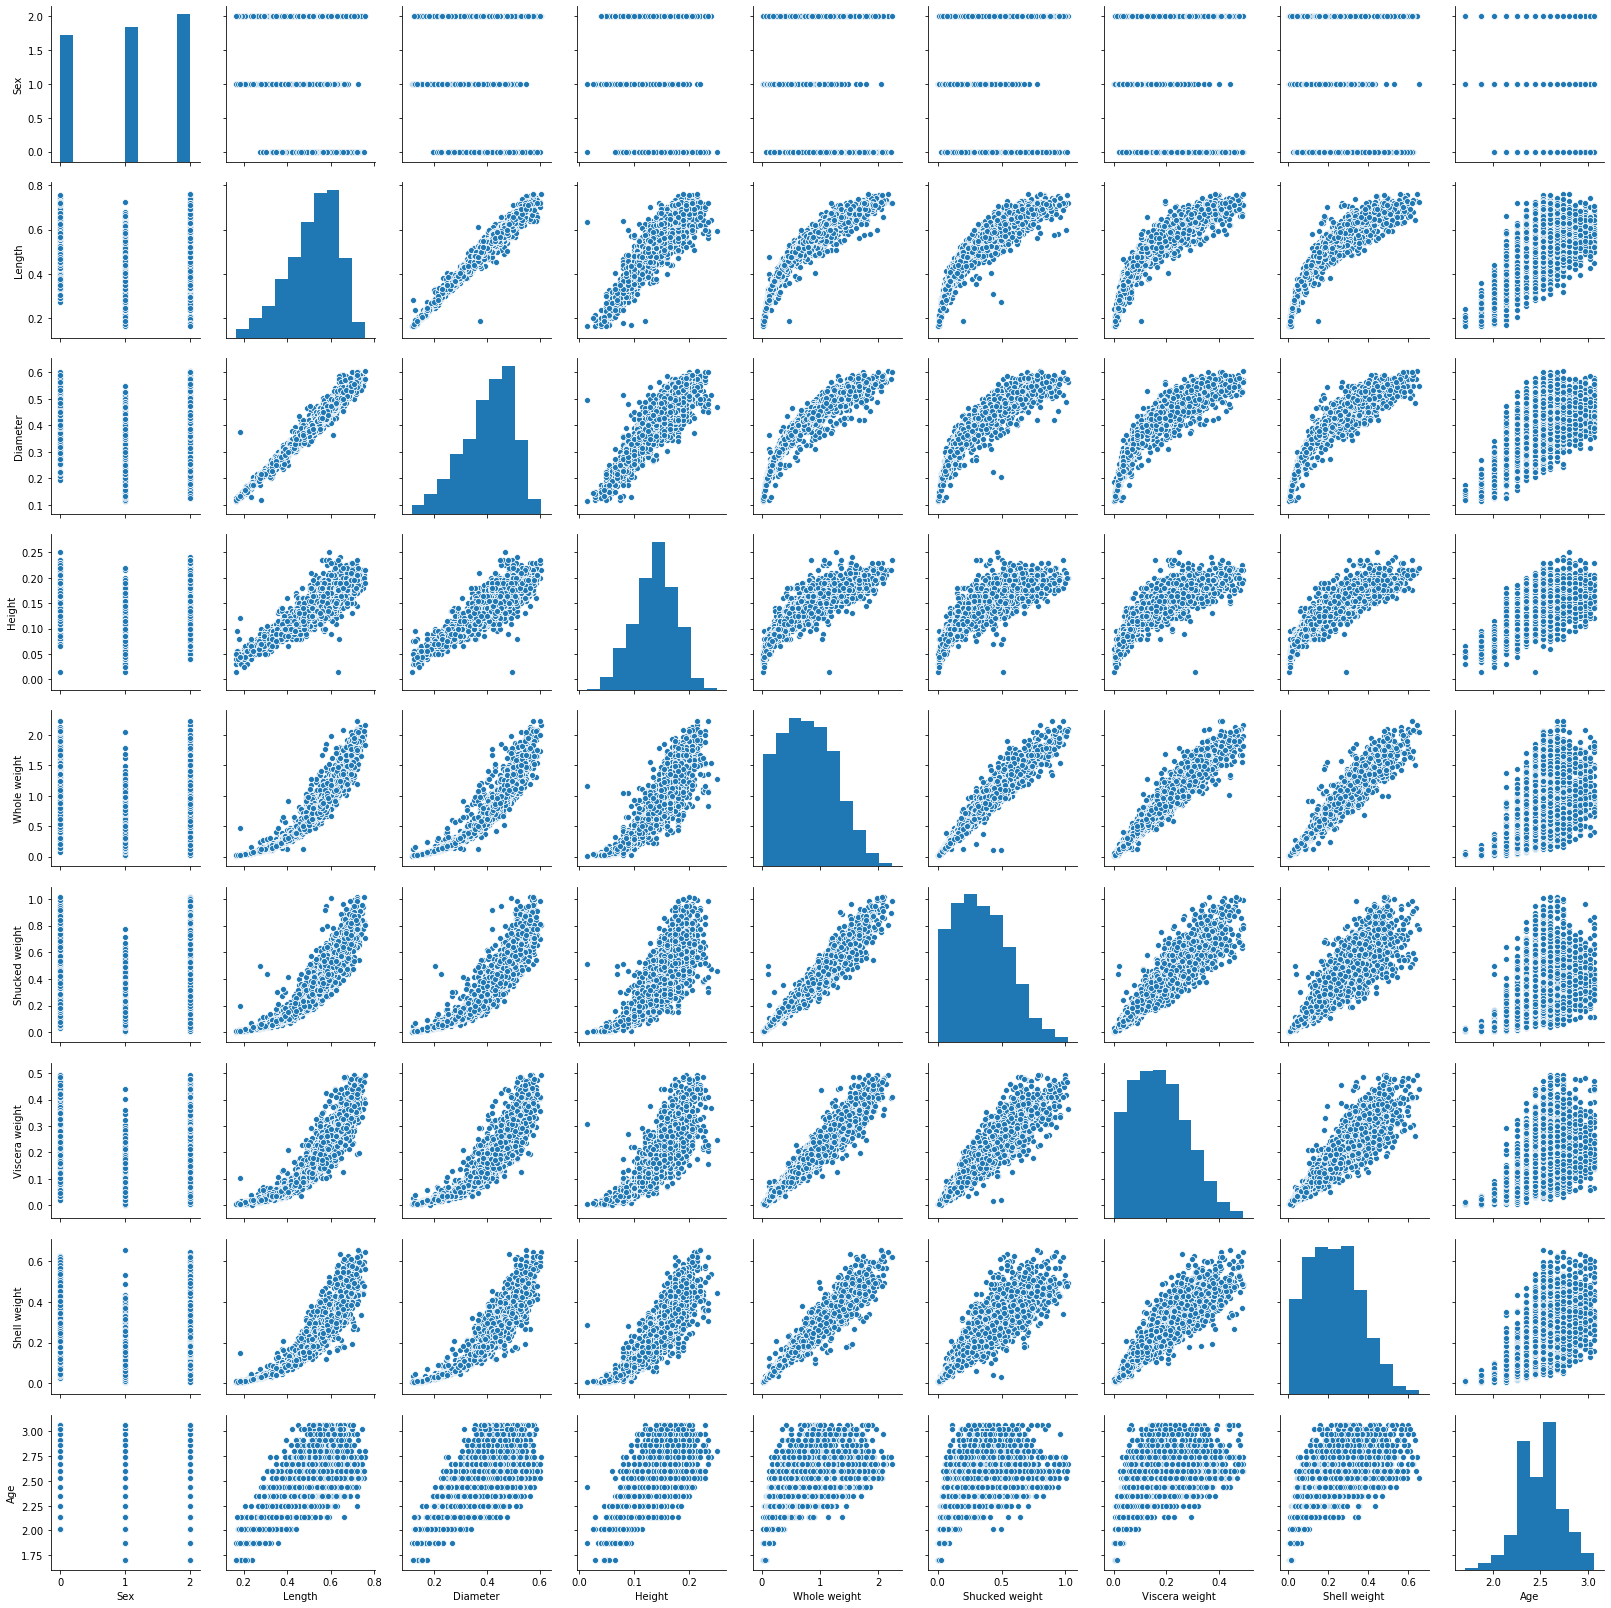

In [36]:
sns.pairplot(abalone)

Features and Target Value

In [37]:
x=abalone.drop(['Age','Sex'],axis=1)
y=abalone['Age']

In [38]:
x.head(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07


In [39]:
y.head(2)

0    2.862201
1    2.251292
Name: Age, dtype: float64

Standardisation

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
x=sc.fit_transform(x)
x

array([[-0.56936804, -0.42027443, -1.16620737, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [-1.47535808, -1.4631268 , -1.30180583, ..., -1.20941043,
        -1.23110406, -1.25603283],
       [ 0.07776771,  0.15329438, -0.08141969, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 0.68176107,  0.72686319,  1.81695876, ...,  0.85473721,
         1.08172072,  0.60445329],
       [ 0.89747298,  0.83114842,  0.32537569, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.63089349,  1.56114509,  1.54576184, ...,  2.88981235,
         1.94298183,  2.06626381]])

Spilt Train and Test

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [43]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    return random_state

LinearRegression

In [44]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x000000CE371EAF78> 
is:  82 
and it produces 
 r2 score of  0.5614699017235472 
 mean abs error value of  0.119053307527009 
 mean squared error value of 0.023320115928566892 
 & root mean sq error  0.1527092529238713


82

In [45]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.41392290359257006


Decision Tree Regressor

In [46]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [47]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=5)
mod(dtr,x,y)

the random state at  <function mod at 0x000000CE371EAF78> 
is:  39 
and it produces 
 r2 score of  0.5792490479936491 
 mean abs error value of  0.11629316256683846 
 mean squared error value of 0.022374658014140347 
 & root mean sq error  0.14958160987949137


39

In [48]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.40124443126702436


KNeighbors Regressor

In [49]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 18}

In [66]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=18)
mod(knr,x,y)

the random state at  <function mod at 0x000000CE371EAF78> 
is:  117 
and it produces 
 r2 score of  0.584026144651348 
 mean abs error value of  0.11328124636975223 
 mean squared error value of 0.022120621978079538 
 & root mean sq error  0.14873003051865327


117

In [67]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.4703705252370457


SVR

In [52]:
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=30)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

In [68]:
svr=SVR(kernel='rbf',gamma=0.1)
mod(svr,x,y)

the random state at  <function mod at 0x000000CE371EAF78> 
is:  82 
and it produces 
 r2 score of  0.6226667862087489 
 mean abs error value of  0.1078611267949219 
 mean squared error value of 0.020065793257737687 
 & root mean sq error  0.14165377953919087


82

In [69]:
#Cross Validation
svr_scr=cross_val_score(svr,x,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.5012545617509363


AdaBoost Regressor

In [70]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
mod(ada,x,y)

the random state at  <function mod at 0x000000CE371EAF78> 
is:  99 
and it produces 
 r2 score of  0.5020819175873554 
 mean abs error value of  0.1321956964938698 
 mean squared error value of 0.02647824505188835 
 & root mean sq error  0.16272137244962123


99

Final Model

In [71]:
svr=SVR(kernel='rbf',gamma=0.1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=82)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
r2score=r2_score(y_test,pred)
MAE= mean_absolute_error(y_test,pred)
MSE= mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
print('At SVR the r2 score=',r2score)

At SVR the r2 score= 0.6452652643687926


In [72]:
pred

array([2.63644128, 2.49298882, 2.58077677, ..., 2.5699197 , 1.91147962,
       2.05632126])

In [73]:
import joblib
joblib.dump(svr,"SVR for Abalone.pkl")

['SVR for Abalone.pkl']